# Screen Time and Its Impact on Sleep Quality and Academic Productivity
## A Personal Data Science Study

---

### Problem Statement
> **"How does screen time behavior influence sleep quality and academic productivity of a college student, and can a predictive model be built to estimate productivity based on daily screen usage patterns?"**

### Research Questions
1. **RQ1**: Is there a significant difference in total screen time between weekdays and weekends?
2. **RQ2**: What is the relationship between screen time before bed and sleep quality?
3. **RQ3**: Does gaming time significantly affect productivity levels?
4. **RQ4**: What screen time factors best predict a student's daily productivity score?
5. **RQ5**: How do screen time patterns and trends change over the 69-day observation period?

### Objectives
- Collect and document personal non-sensitive screen time data over 69 days
- Clean and preprocess the dataset (handle missing values, outliers)
- Perform exploratory data analysis with meaningful visualizations
- Conduct statistical tests to validate hypotheses
- Build a linear regression model to predict productivity
- Derive evidence-based insights about screen time habits

In [46]:
# ============================================================
# Import Libraries
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Plot settings
sns.set_theme(style='whitegrid', palette='Set2')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12



## 1. Data Loading & Description
The dataset consists of **69 daily observations** collected from **December 4, 2025 to February 10, 2026**. Data was self-tracked and recorded manually, covering screen time habits, sleep patterns, mood, stress, and academic productivity.

In [47]:
# ============================================================
# Load the Dataset
# ============================================================
df = pd.read_csv('screen_time_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Date Range  : {df['Date'].min().strftime('%B %d, %Y')} to {df['Date'].max().strftime('%B %d, %Y')}")
print(f"Total Days  : {len(df)}")
print()
df.head(10)

Dataset Shape: 69 rows × 17 columns
Date Range  : December 04, 2025 to February 10, 2026
Total Days  : 69



,Date,Day_of_Week,Day_Type,Total_Screen_Time_hrs,Social_Media_hrs,Gaming_hrs,Productive_Screen_Time_hrs,Entertainment_hrs,Mood,Stress_Level,Productivity_Score,Study_Hours,Sleep_Duration_hrs,Sleep_Quality,Screen_Before_Bed_min,Bedtime,Caffeine_Drinks
0,2025-12-04,Thursday,Weekday,9.0,1.0,0.0,6.0,2.0,3.0,4,4,5.0,5.0,2.0,25,02:30,2.0
1,2025-12-05,Friday,Weekday,11.5,1.5,3.5,4.0,2.5,4.0,2,3,3.0,5.5,3.0,70,02:30,1.0
2,2025-12-06,Saturday,Weekend,13.5,2.5,5.0,2.0,4.0,4.0,1,2,1.5,8.5,4.0,65,02:00,0.0
3,2025-12-07,Sunday,Weekend,10.5,2.0,2.5,4.0,2.0,3.0,2,3,3.5,7.0,4.0,45,01:30,1.0
4,2025-12-08,Monday,Weekday,9.5,1.0,0.5,6.0,2.0,3.0,3,4,5.0,5.5,3.0,30,02:30,2.0
5,2025-12-09,Tuesday,Weekday,8.5,0.5,0.0,6.5,1.5,2.0,4,4,5.5,4.5,2.0,20,03:00,3.0
6,2025-12-10,Wednesday,Weekday,11.0,1.5,3.0,4.5,2.0,4.0,2,3,3.5,6.0,3.0,55,02:00,1.0
7,2025-12-11,Thursday,Weekday,9.0,0.5,0.0,7.0,1.5,2.0,5,5,6.0,4.0,1.0,15,03:30,3.0
8,2025-12-12,Friday,Weekday,12.5,2.0,4.5,3.0,3.0,5.0,1,2,1.5,5.5,3.0,85,03:00,0.0
9,2025-12-13,Saturday,Weekend,14.0,3.0,5.0,1.5,4.5,5.0,1,1,0.5,9.0,5.0,60,02:30,0.0


In [48]:
# Dataset structure and descriptive statistics
print("=" * 60)
print("DATASET INFO")
print("=" * 60)
df.info()
print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)
df.describe().round(2)

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        69 non-null     datetime64[ns]
 1   Day_of_Week                 69 non-null     object        
 2   Day_Type                    69 non-null     object        
 3   Total_Screen_Time_hrs       69 non-null     float64       
 4   Social_Media_hrs            69 non-null     float64       
 5   Gaming_hrs                  69 non-null     float64       
 6   Productive_Screen_Time_hrs  69 non-null     float64       
 7   Entertainment_hrs           69 non-null     float64       
 8   Mood                        68 non-null     float64       
 9   Stress_Level                69 non-null     int64         
 10  Productivity_Score          69 non-null     int64         
 11  Study_Hours                 69 non-null     flo

,Date,Total_Screen_Time_hrs,Social_Media_hrs,Gaming_hrs,Productive_Screen_Time_hrs,Entertainment_hrs,Mood,Stress_Level,Productivity_Score,Study_Hours,Sleep_Duration_hrs,Sleep_Quality,Screen_Before_Bed_min,Caffeine_Drinks
count,69,69.00,69.00,69.00,69.00,69.00,68.00,69.00,69.00,69.00,69.00,68.00,69.00,68.00
mean,2026-01-07 00:00:00,10.76,1.85,2.41,3.83,2.67,3.49,2.41,2.64,2.96,6.46,3.24,49.78,1.29
min,2025-12-04 00:00:00,6.00,0.50,0.00,0.00,1.00,1.00,1.00,1.00,0.00,3.50,1.00,10.00,0.00
25%,2025-12-21 00:00:00,9.00,1.00,0.00,2.00,2.00,3.00,1.00,2.00,1.00,5.00,2.00,30.00,0.00
50%,2026-01-07 00:00:00,10.50,2.00,2.00,4.00,2.50,3.50,2.00,3.00,3.00,6.00,3.00,50.00,1.00
75%,2026-01-24 00:00:00,12.50,2.50,4.50,6.00,3.50,4.00,4.00,4.00,5.00,8.00,4.00,65.00,2.00
max,2026-02-10 00:00:00,14.50,4.00,6.00,8.00,5.50,5.00,5.00,5.00,7.00,10.00,5.00,200.00,3.00
std,NaN,2.09,0.94,2.03,2.07,1.10,1.01,1.45,1.24,2.13,1.79,1.12,28.87,1.04


### Data Dictionary

| Variable | Type | Unit | Description |
|---|---|---|---|
| Date | Date | YYYY-MM-DD | Date of observation |
| Day_of_Week | Categorical | — | Day name (Monday–Sunday) |
| Day_Type | Categorical | — | Weekday or Weekend/Holiday |
| Total_Screen_Time_hrs | Numeric | Hours | Total screen usage for the day |
| Social_Media_hrs | Numeric | Hours | Time spent on social media |
| Gaming_hrs | Numeric | Hours | Time spent gaming |
| Productive_Screen_Time_hrs | Numeric | Hours | Time on work/study-related screens |
| Entertainment_hrs | Numeric | Hours | Time on streaming/YouTube/etc. |
| Mood | Ordinal | 1–5 | Self-rated mood (1=Very Bad, 5=Very Good) |
| Stress_Level | Ordinal | 1–5 | Self-rated stress (1=Very Low, 5=Very High) |
| Productivity_Score | Ordinal | 1–5 | Self-rated productivity (1=Very Low, 5=Very High) |
| Study_Hours | Numeric | Hours | Time spent studying |
| Sleep_Duration_hrs | Numeric | Hours | Total hours of sleep |
| Sleep_Quality | Ordinal | 1–5 | Self-rated sleep quality (1=Very Poor, 5=Very Good) |
| Screen_Before_Bed_min | Numeric | Minutes | Screen usage within 1 hour before sleep |
| Bedtime | Time | HH:MM | Time of going to bed |
| Caffeine_Drinks | Numeric | Count | Number of caffeinated drinks consumed |

## 2. Data Cleaning & Preprocessing
Before analysis, we need to:
1. **Identify and handle missing values**
2. **Detect and treat outliers**
3. **Engineer new features** for deeper analysis

In [49]:
# ============================================================
# Step 1: Identify Missing Values
# ============================================================
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage (%)': missing_pct
})

print("=" * 50)
print("MISSING VALUES REPORT")
print("=" * 50)
print(f"Total missing values: {df.isnull().sum().sum()}\n")
missing_df[missing_df['Missing Count'] > 0]

MISSING VALUES REPORT
Total missing values: 3



,Missing Count,Percentage (%)
Mood,1,1.45
Sleep_Quality,1,1.45
Caffeine_Drinks,1,1.45


In [50]:
# ============================================================
# Step 2: Handle Missing Values (Median Imputation)
# ============================================================
# Strategy: Use median for ordinal/numeric variables
# Median is preferred over mean for ordinal scales (1-5)

print("Imputing missing values with median...\n")

for col in ['Mood', 'Sleep_Quality', 'Caffeine_Drinks']:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"  ✓ {col}: filled {missing_count} missing → median = {median_val}")

print(f"\nRemaining missing values: {df.isnull().sum().sum()}")

Imputing missing values with median...

  ✓ Mood: filled 1 missing → median = 3.5
  ✓ Sleep_Quality: filled 1 missing → median = 3.0
  ✓ Caffeine_Drinks: filled 1 missing → median = 1.0

Remaining missing values: 0


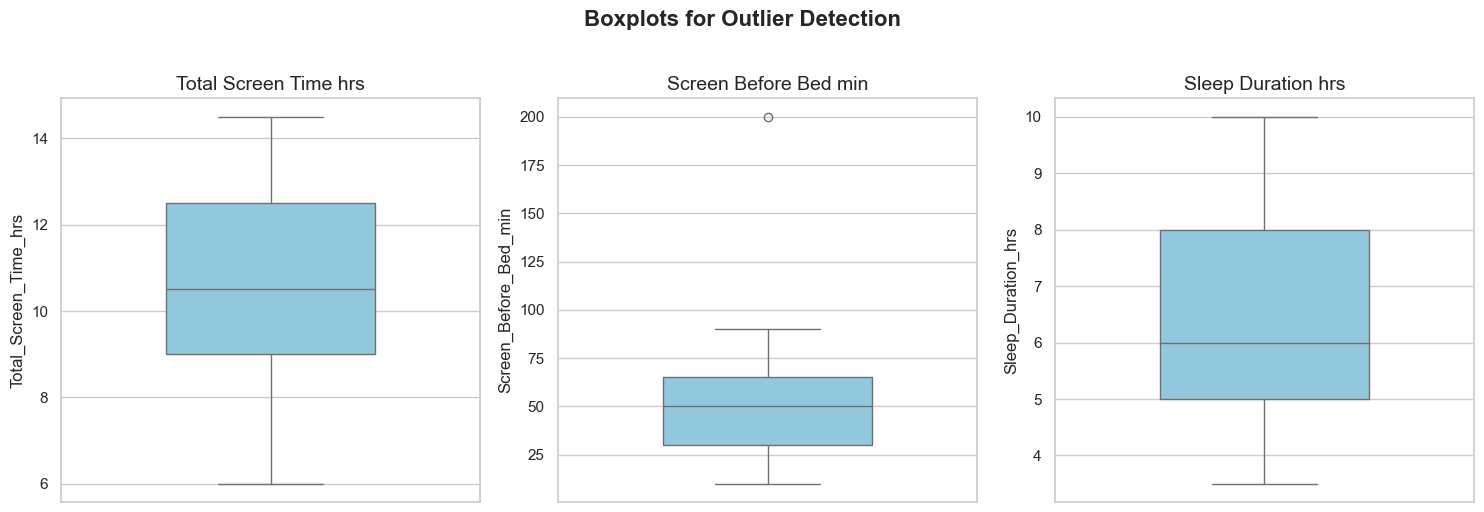


IQR Method for Screen_Before_Bed_min:
  Q1 = 30.0, Q3 = 65.0, IQR = 35.0
  Upper Bound = 117.5
  Outliers found: 1
      Date  Screen_Before_Bed_min
2026-01-17                    200


In [51]:
# ============================================================
# Step 3: Detect Outliers Using IQR Method
# ============================================================
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boxplots for key numeric variables
for i, col in enumerate(['Total_Screen_Time_hrs', 'Screen_Before_Bed_min', 'Sleep_Duration_hrs']):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue', width=0.5)
    axes[i].set_title(col.replace('_', ' '))

plt.suptitle('Boxplots for Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# IQR calculation for Screen_Before_Bed_min
Q1 = df['Screen_Before_Bed_min'].quantile(0.25)
Q3 = df['Screen_Before_Bed_min'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

outliers = df[df['Screen_Before_Bed_min'] > upper_bound]
print(f"\nIQR Method for Screen_Before_Bed_min:")
print(f"  Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print(f"  Upper Bound = {upper_bound}")
print(f"  Outliers found: {len(outliers)}")
if len(outliers) > 0:
    print(outliers[['Date', 'Screen_Before_Bed_min']].to_string(index=False))

In [52]:
# ============================================================
# Step 4: Cap the Outlier (Winsorization)
# ============================================================
df.loc[df['Screen_Before_Bed_min'] > upper_bound, 'Screen_Before_Bed_min'] = upper_bound

print(f"Outlier capped at {upper_bound:.1f} minutes")
print(f"Screen_Before_Bed_min range: {df['Screen_Before_Bed_min'].min():.1f} – {df['Screen_Before_Bed_min'].max():.1f}")

Outlier capped at 117.5 minutes
Screen_Before_Bed_min range: 10.0 – 117.5


In [53]:
# ============================================================
# Step 5: Feature Engineering
# ============================================================

# Convert Bedtime (HH:MM) to numeric hours past midnight
def bedtime_to_hours(time_str):
    """Convert time string to hours past midnight."""
    h, m = map(int, str(time_str).split(':'))
    return h + m / 60

df['Bedtime_Hours'] = df['Bedtime'].apply(bedtime_to_hours)

# Binary: Is it a weekday?
df['Is_Weekday'] = (df['Day_Type'] == 'Weekday').astype(int)

# Non-productive screen time (gaming + social media + entertainment)
df['Non_Productive_hrs'] = df['Total_Screen_Time_hrs'] - df['Productive_Screen_Time_hrs']

# Day number for trend analysis
df['Day_Number'] = (df['Date'] - df['Date'].min()).dt.days + 1

print("New features created:")
print(f"  • Bedtime_Hours       — e.g., 02:30 → 2.5")
print(f"  • Is_Weekday          — 1 = Weekday, 0 = Weekend/Holiday")
print(f"  • Non_Productive_hrs  — Total - Productive screen time")
print(f"  • Day_Number          — Sequential day count (1–{df['Day_Number'].max()})")
print()
df[['Date', 'Bedtime', 'Bedtime_Hours', 'Day_Type', 'Is_Weekday', 'Non_Productive_hrs']].head()

New features created:
  • Bedtime_Hours       — e.g., 02:30 → 2.5
  • Is_Weekday          — 1 = Weekday, 0 = Weekend/Holiday
  • Non_Productive_hrs  — Total - Productive screen time
  • Day_Number          — Sequential day count (1–69)



,Date,Bedtime,Bedtime_Hours,Day_Type,Is_Weekday,Non_Productive_hrs
0,2025-12-04,02:30,2.5,Weekday,1,3.0
1,2025-12-05,02:30,2.5,Weekday,1,7.5
2,2025-12-06,02:00,2.0,Weekend,0,11.5
3,2025-12-07,01:30,1.5,Weekend,0,6.5
4,2025-12-08,02:30,2.5,Weekday,1,3.5


In [54]:
# ============================================================
# Verification: Clean Dataset Summary
# ============================================================
print("=" * 50)
print("CLEANED DATASET SUMMARY")
print("=" * 50)
print(f"Shape          : {df.shape}")
print(f"Missing values : {df.isnull().sum().sum()}")
print(f"Duplicates     : {df.duplicated().sum()}")
print()
df.describe().round(2)

CLEANED DATASET SUMMARY
Shape          : (69, 21)
Missing values : 0
Duplicates     : 0



,Date,Total_Screen_Time_hrs,Social_Media_hrs,Gaming_hrs,Productive_Screen_Time_hrs,Entertainment_hrs,Mood,Stress_Level,Productivity_Score,Study_Hours,Sleep_Duration_hrs,Sleep_Quality,Screen_Before_Bed_min,Caffeine_Drinks,Bedtime_Hours,Is_Weekday,Non_Productive_hrs,Day_Number
count,69,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00,69.00
mean,2026-01-07 00:00:00,10.76,1.85,2.41,3.83,2.67,3.49,2.41,2.64,2.96,6.46,3.23,48.59,1.29,2.52,0.57,6.93,35.00
min,2025-12-04 00:00:00,6.00,0.50,0.00,0.00,1.00,1.00,1.00,1.00,0.00,3.50,1.00,10.00,0.00,1.00,0.00,1.50,1.00
25%,2025-12-21 00:00:00,9.00,1.00,0.00,2.00,2.00,3.00,1.00,2.00,1.00,5.00,2.00,30.00,0.00,2.00,0.00,3.00,18.00
50%,2026-01-07 00:00:00,10.50,2.00,2.00,4.00,2.50,3.50,2.00,3.00,3.00,6.00,3.00,50.00,1.00,2.50,1.00,7.50,35.00
75%,2026-01-24 00:00:00,12.50,2.50,4.50,6.00,3.50,4.00,4.00,4.00,5.00,8.00,4.00,65.00,2.00,3.00,1.00,10.50,52.00
max,2026-02-10 00:00:00,14.50,4.00,6.00,8.00,5.50,5.00,5.00,5.00,7.00,10.00,5.00,117.50,3.00,4.00,1.00,13.50,69.00
std,NaN,2.09,0.94,2.03,2.07,1.10,1.01,1.45,1.24,2.13,1.79,1.11,23.82,1.03,0.80,0.50,3.78,20.06


## 3. Exploratory Data Analysis (EDA)
In this section, we explore the dataset through visualizations to identify patterns, distributions, and relationships among variables before conducting formal statistical tests.

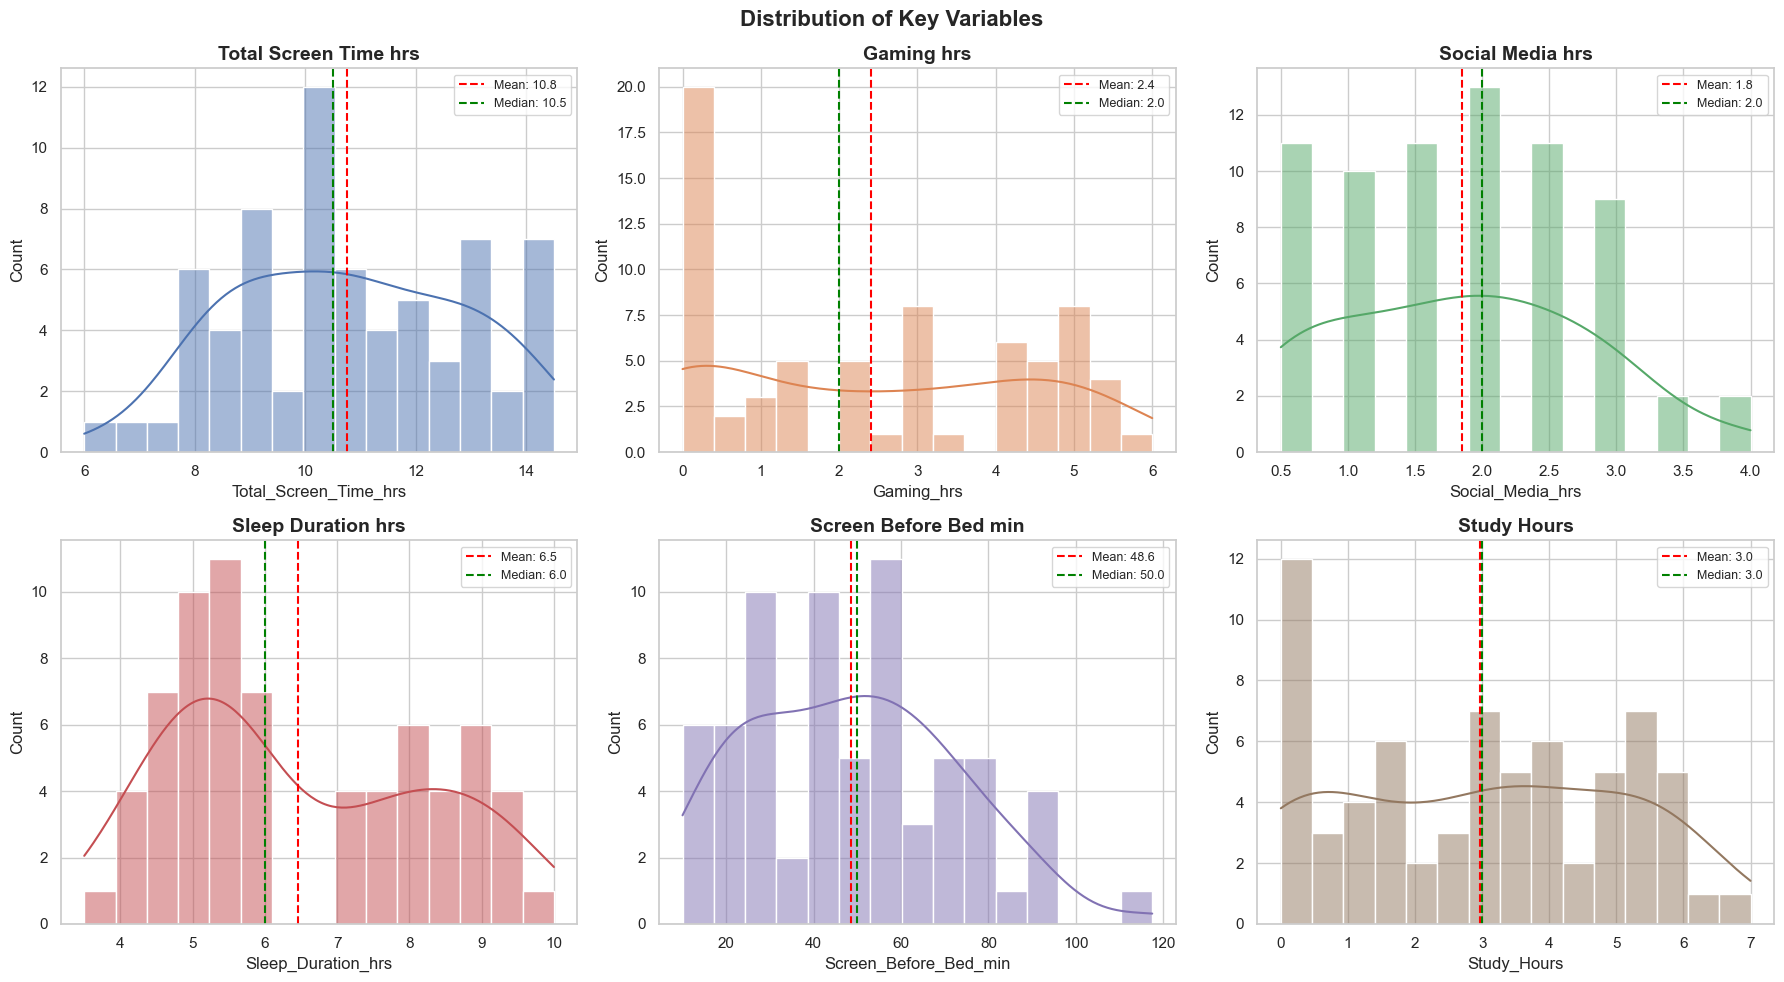

In [55]:
# ============================================================
# 3.1 Distribution of Key Variables
# EDA Technique: Histogram with KDE (Kernel Density Estimation) Overlay
# ============================================================
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

variables = ['Total_Screen_Time_hrs', 'Gaming_hrs', 'Social_Media_hrs',
             'Sleep_Duration_hrs', 'Screen_Before_Bed_min', 'Study_Hours']
colors = ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860']

for i, (var, color) in enumerate(zip(variables, colors)):
    row, col = i // 3, i % 3
    sns.histplot(df[var], kde=True, ax=axes[row][col], color=color, bins=15)
    axes[row][col].axvline(df[var].mean(), color='red', linestyle='--',
                           label=f'Mean: {df[var].mean():.1f}')
    axes[row][col].axvline(df[var].median(), color='green', linestyle='--',
                           label=f'Median: {df[var].median():.1f}')
    axes[row][col].set_title(var.replace('_', ' '), fontweight='bold')
    axes[row][col].legend(fontsize=9)

plt.suptitle('Distribution of Key Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

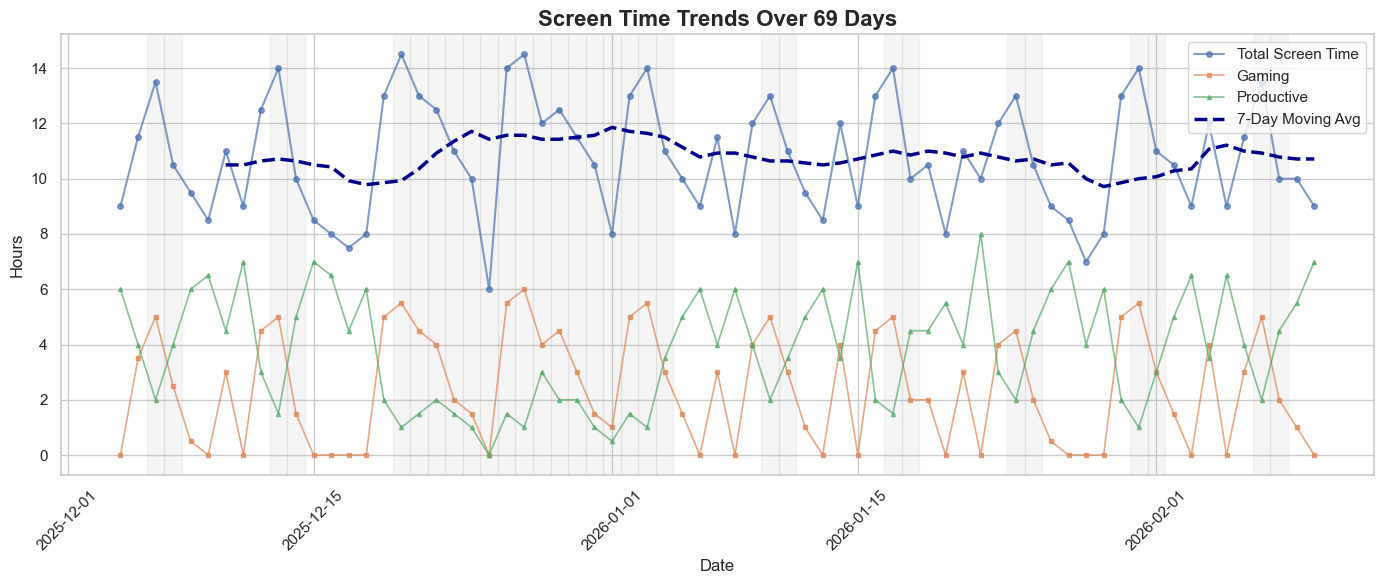

In [56]:
# ============================================================
# 3.2 Screen Time Trends Over Time (RQ5)
# EDA Technique: Time Series Line Plot with 7-Day Moving Average
# ============================================================
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(df['Date'], df['Total_Screen_Time_hrs'], marker='o', markersize=4,
        linewidth=1.5, color='#4C72B0', alpha=0.7, label='Total Screen Time')
ax.plot(df['Date'], df['Gaming_hrs'], marker='s', markersize=3,
        linewidth=1.2, color='#DD8452', alpha=0.7, label='Gaming')
ax.plot(df['Date'], df['Productive_Screen_Time_hrs'], marker='^', markersize=3,
        linewidth=1.2, color='#55A868', alpha=0.7, label='Productive')

# Add 7-day moving average for total screen time
ma = df['Total_Screen_Time_hrs'].rolling(window=7).mean()
ax.plot(df['Date'], ma, linewidth=2.5, color='darkblue', linestyle='--',
        label='7-Day Moving Avg')

# Shade weekends
for i, row in df.iterrows():
    if row['Day_Type'] == 'Weekend':
        ax.axvspan(row['Date'] - pd.Timedelta(hours=12),
                   row['Date'] + pd.Timedelta(hours=12),
                   alpha=0.08, color='gray')

ax.set_xlabel('Date')
ax.set_ylabel('Hours')
ax.set_title('Screen Time Trends Over 69 Days', fontsize=16, fontweight='bold')
ax.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

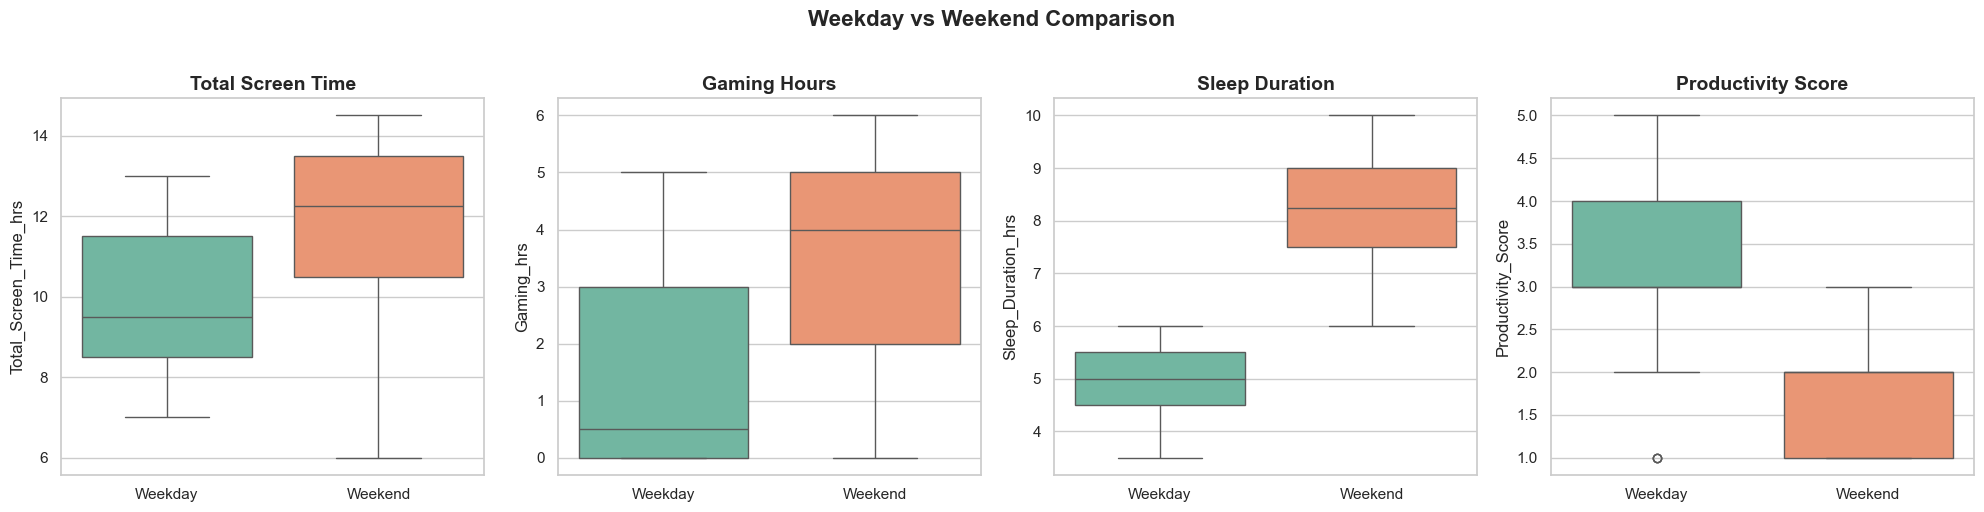

Mean Values by Day Type:
          Total_Screen_Time_hrs  Gaming_hrs  Sleep_Duration_hrs  Productivity_Score
Day_Type                                                                           
Weekday                    9.91        1.50                5.06                3.33
Weekend                   11.87        3.58                8.27                1.73


In [57]:
# ============================================================
# 3.3 Weekday vs Weekend Comparison (RQ1 Visual)
# EDA Technique: Grouped Box Plots (Side-by-Side Comparison)
# ============================================================
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

compare_vars = ['Total_Screen_Time_hrs', 'Gaming_hrs',
                'Sleep_Duration_hrs', 'Productivity_Score']
titles = ['Total Screen Time', 'Gaming Hours',
          'Sleep Duration', 'Productivity Score']

for i, (var, title) in enumerate(zip(compare_vars, titles)):
    sns.boxplot(data=df, x='Day_Type', y=var, ax=axes[i], palette='Set2')
    axes[i].set_title(title, fontweight='bold')
    axes[i].set_xlabel('')

plt.suptitle('Weekday vs Weekend Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Mean Values by Day Type:")
print("=" * 65)
print(df.groupby('Day_Type')[compare_vars].mean().round(2).to_string())

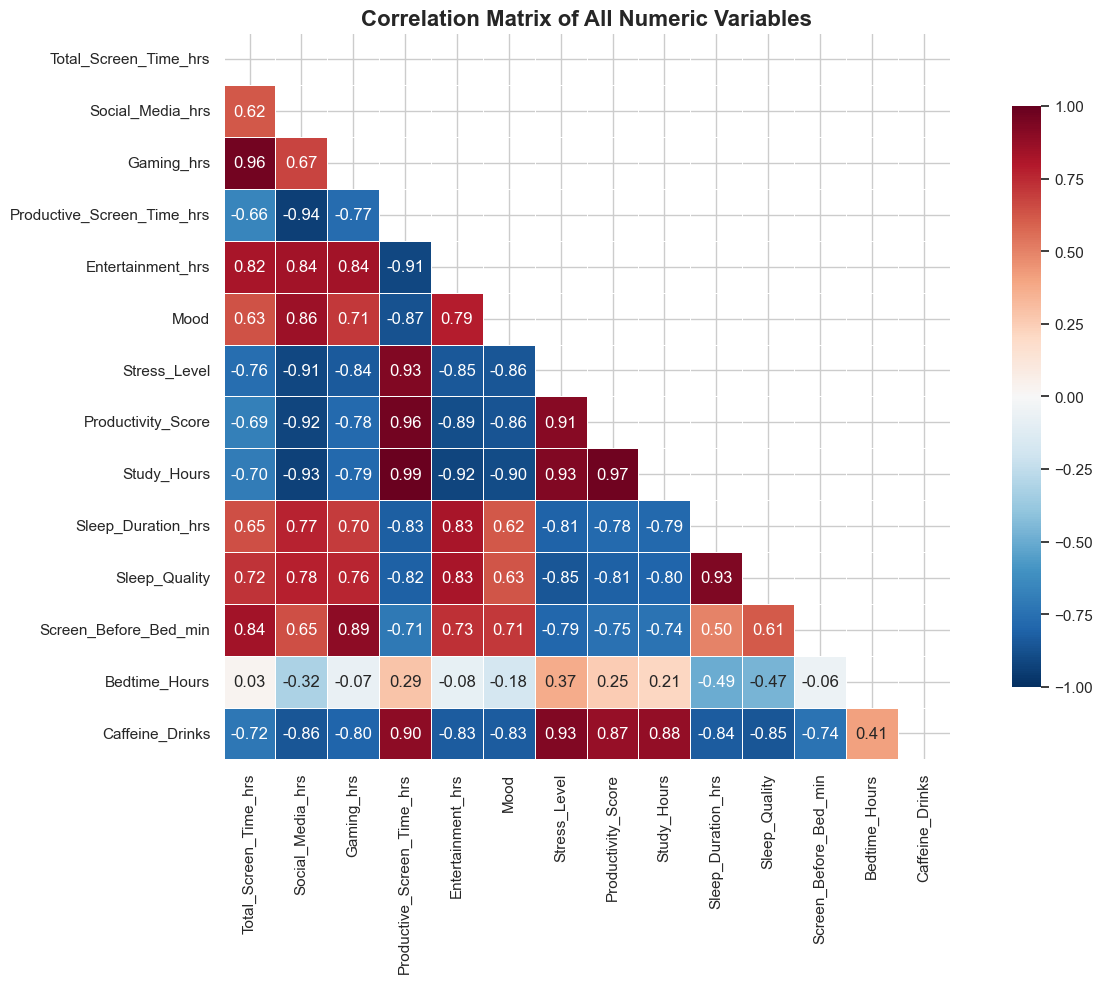


Correlations with Productivity_Score:
  Social_Media_hrs                    -0.921  (STRONG ↓)
  Entertainment_hrs                   -0.890  (STRONG ↓)
  Mood                                -0.860  (STRONG ↓)
  Sleep_Quality                       -0.814  (STRONG ↓)
  Sleep_Duration_hrs                  -0.779  (STRONG ↓)
  Gaming_hrs                          -0.776  (STRONG ↓)
  Screen_Before_Bed_min               -0.747  (STRONG ↓)
  Total_Screen_Time_hrs               -0.687  (STRONG ↓)
  Bedtime_Hours                       +0.253  (weak ↑)
  Caffeine_Drinks                     +0.869  (STRONG ↑)
  Stress_Level                        +0.913  (STRONG ↑)
  Productive_Screen_Time_hrs          +0.962  (STRONG ↑)
  Study_Hours                         +0.971  (STRONG ↑)


In [58]:
# ============================================================
# 3.4 Correlation Heatmap
# EDA Technique: Pearson Correlation Matrix Heatmap
# ============================================================
numeric_cols = ['Total_Screen_Time_hrs', 'Social_Media_hrs', 'Gaming_hrs',
                'Productive_Screen_Time_hrs', 'Entertainment_hrs', 'Mood',
                'Stress_Level', 'Productivity_Score', 'Study_Hours',
                'Sleep_Duration_hrs', 'Sleep_Quality', 'Screen_Before_Bed_min',
                'Bedtime_Hours', 'Caffeine_Drinks']

corr_matrix = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, square=True, linewidths=0.5,
            cbar_kws={'shrink': 0.8}, ax=ax)
ax.set_title('Correlation Matrix of All Numeric Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Highlight correlations with Productivity_Score
print("\nCorrelations with Productivity_Score:")
print("=" * 50)
prod_corr = corr_matrix['Productivity_Score'].drop('Productivity_Score').sort_values()
for var, val in prod_corr.items():
    direction = "↑" if val > 0 else "↓"
    strength = "STRONG" if abs(val) > 0.6 else "moderate" if abs(val) > 0.3 else "weak"
    print(f"  {var:35s} {val:+.3f}  ({strength} {direction})")

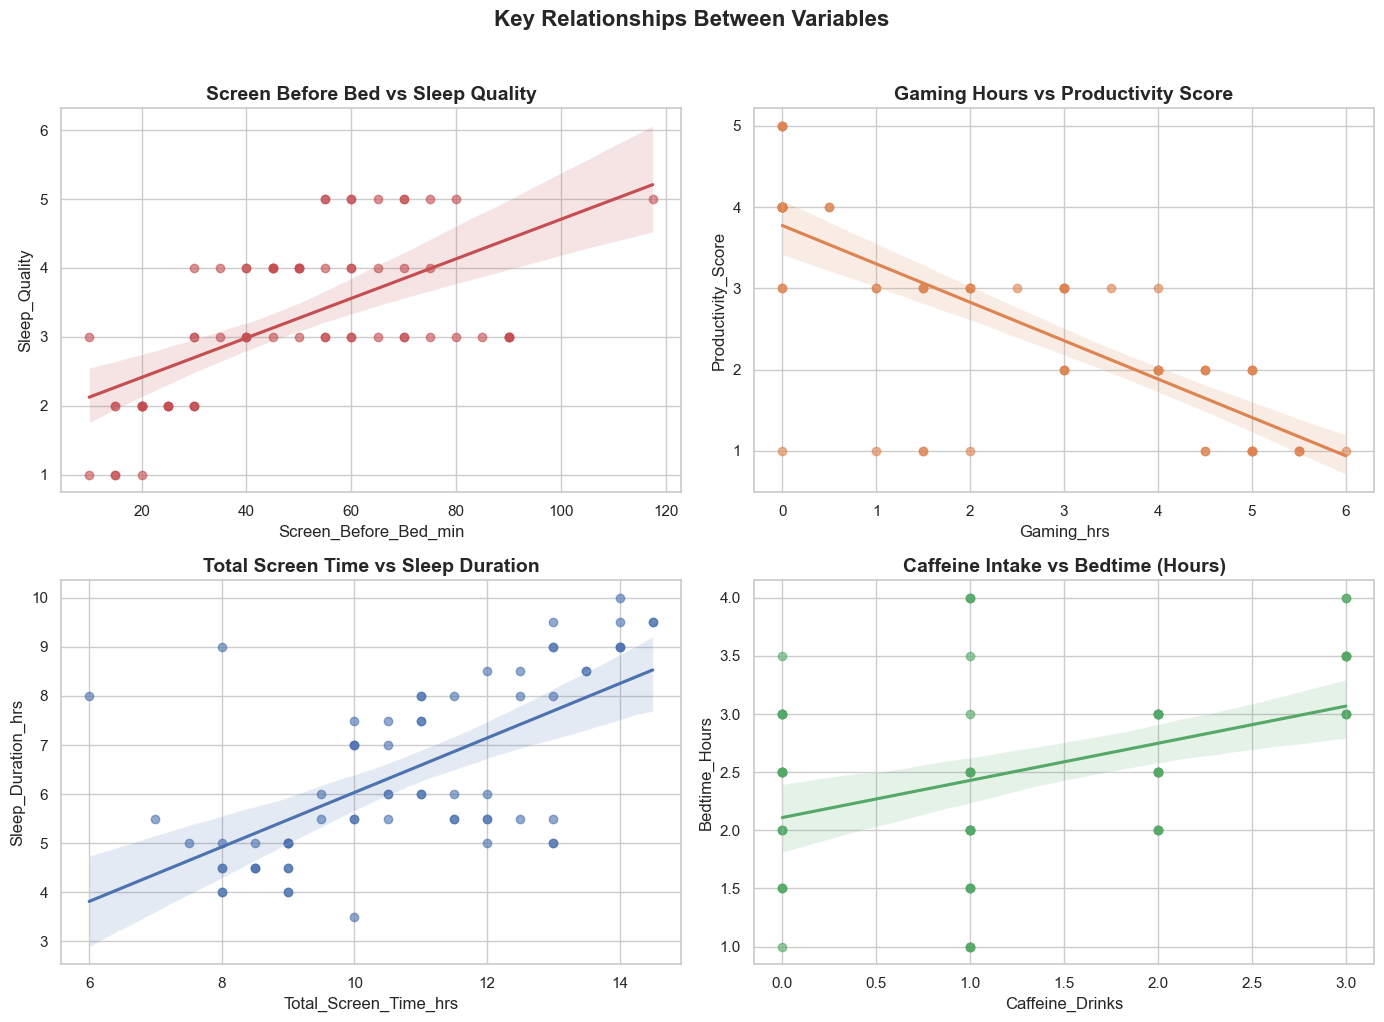

In [59]:
# ============================================================
# 3.5 Key Relationships — Scatter Plots
# EDA Technique: Scatter Plots with OLS Regression Line (regplot)
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Screen Before Bed vs Sleep Quality (RQ2 Visual)
sns.regplot(data=df, x='Screen_Before_Bed_min', y='Sleep_Quality',
            ax=axes[0][0], scatter_kws={'alpha': 0.6}, color='#C44E52')
axes[0][0].set_title('Screen Before Bed vs Sleep Quality', fontweight='bold')

# Plot 2: Gaming Hours vs Productivity Score (RQ3 Visual)
sns.regplot(data=df, x='Gaming_hrs', y='Productivity_Score',
            ax=axes[0][1], scatter_kws={'alpha': 0.6}, color='#DD8452')
axes[0][1].set_title('Gaming Hours vs Productivity Score', fontweight='bold')

# Plot 3: Total Screen Time vs Sleep Duration
sns.regplot(data=df, x='Total_Screen_Time_hrs', y='Sleep_Duration_hrs',
            ax=axes[1][0], scatter_kws={'alpha': 0.6}, color='#4C72B0')
axes[1][0].set_title('Total Screen Time vs Sleep Duration', fontweight='bold')

# Plot 4: Caffeine Intake vs Bedtime
sns.regplot(data=df, x='Caffeine_Drinks', y='Bedtime_Hours',
            ax=axes[1][1], scatter_kws={'alpha': 0.6}, color='#55A868')
axes[1][1].set_title('Caffeine Intake vs Bedtime (Hours)', fontweight='bold')

plt.suptitle('Key Relationships Between Variables', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

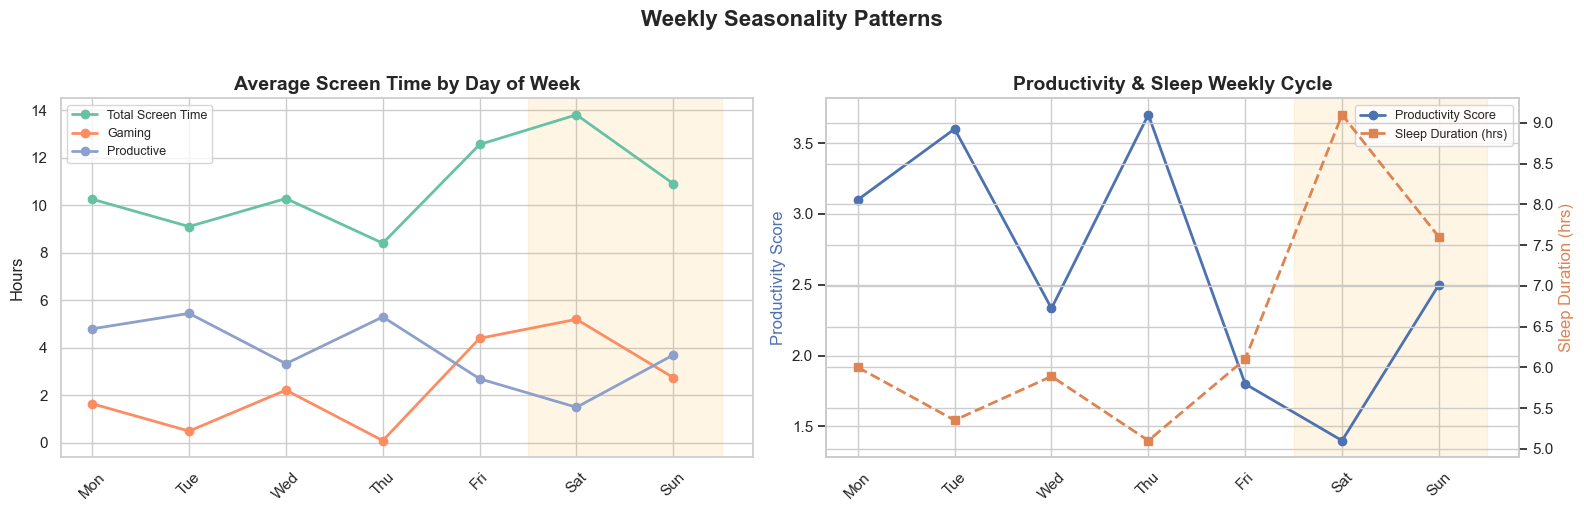


Weekly Averages:
             Total_Screen_Time_hrs  Gaming_hrs  Productivity_Score  Sleep_Duration_hrs
Day_of_Week                                                                           
Monday                       10.25        1.65                3.10                6.00
Tuesday                       9.10        0.50                3.60                5.35
Wednesday                    10.28        2.22                2.33                5.89
Thursday                      8.40        0.10                3.70                5.10
Friday                       12.55        4.40                1.80                6.10
Saturday                     13.80        5.20                1.40                9.10
Sunday                       10.90        2.75                2.50                7.60


In [60]:
# ============================================================
# 3.6 Weekly Seasonality Patterns
# EDA Technique: Grouped Line Chart (Weekly Seasonal Analysis)
# ============================================================
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Panel 1: Average screen time components by day of week
weekly_screen = df.groupby('Day_of_Week')[['Total_Screen_Time_hrs', 'Gaming_hrs',
                                            'Productive_Screen_Time_hrs']].mean().reindex(day_order)
weekly_screen.plot(marker='o', ax=axes[0], linewidth=2)
axes[0].set_title('Average Screen Time by Day of Week', fontweight='bold')
axes[0].set_ylabel('Hours')
axes[0].set_xlabel('')
axes[0].legend(['Total Screen Time', 'Gaming', 'Productive'], fontsize=9)
axes[0].set_xticks(range(7))
axes[0].set_xticklabels([d[:3] for d in day_order], rotation=45)
axes[0].axvspan(4.5, 6.5, alpha=0.1, color='orange', label='Weekend')

# Panel 2: Productivity & Sleep seasonal pattern
weekly_other = df.groupby('Day_of_Week')[['Productivity_Score', 'Sleep_Duration_hrs']].mean().reindex(day_order)
ax2 = axes[1]
line1 = ax2.plot(range(7), weekly_other['Productivity_Score'], 'o-',
                 color='#4C72B0', linewidth=2, label='Productivity Score')
ax2.set_ylabel('Productivity Score', color='#4C72B0')
ax2_twin = ax2.twinx()
line2 = ax2_twin.plot(range(7), weekly_other['Sleep_Duration_hrs'], 's--',
                      color='#DD8452', linewidth=2, label='Sleep Duration (hrs)')
ax2_twin.set_ylabel('Sleep Duration (hrs)', color='#DD8452')
ax2.set_title('Productivity & Sleep Weekly Cycle', fontweight='bold')
ax2.set_xticks(range(7))
ax2.set_xticklabels([d[:3] for d in day_order], rotation=45)
ax2.axvspan(4.5, 6.5, alpha=0.1, color='orange')
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, fontsize=9, loc='upper right')

plt.suptitle('Weekly Seasonality Patterns', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print weekly summary
print("\nWeekly Averages:")
print("=" * 75)
weekly_summary = df.groupby('Day_of_Week')[['Total_Screen_Time_hrs', 'Gaming_hrs',
    'Productivity_Score', 'Sleep_Duration_hrs']].mean().reindex(day_order).round(2)
print(weekly_summary.to_string())

### EDA Key Observations

1. **Total screen time** ranges from ~6 to 14.5 hours/day, with higher usage on weekends
2. **Gaming hours** spike on weekends and Fridays, while productive screen time drops
3. **Sleep duration** is longer on weekends (~8–10 hrs) compared to weekdays (~4–6 hrs)
4. **Strong negative correlations** exist between Gaming ↔ Productivity and Gaming ↔ Study Hours
5. **Screen time before bed** shows a positive correlation with sleep quality — this is likely confounded by Day Type, as weekends feature both more screen time before bed and longer/better sleep
6. **Caffeine consumption** is higher on productive weekdays, suggesting a compensatory study pattern
7. **Weekly seasonality** is evident — a clear cyclical pattern emerges where screen time and gaming peak on Saturdays and Sundays, while productivity and study hours peak mid-week (Tuesday–Thursday), creating an inverse weekly rhythm

## 4. Statistical Tests
We conduct four statistical tests to validate our research questions. **Significance level: α = 0.05**

| Test | Research Question | Purpose |
|------|-------------------|---------|
| Independent t-test | RQ1: Weekday vs Weekend screen time | Compare means of two groups |
| Pearson Correlation | RQ2: Screen before bed vs Sleep quality | Measure linear relationship |
| One-Way ANOVA | RQ3: Gaming level vs Productivity | Compare means across 3+ groups |
| Chi-Square Test | Gaming Level × Day Type | Test association between categorical variables |


In [61]:
# ============================================================
# TEST 1: Independent Samples t-test (RQ1)
# Statistical Test: Two-Sample t-test (Student's / Welch's)
# Purpose: Compare means of two independent groups
# Is there a significant difference in total screen time
# between weekdays and weekends?
# ============================================================
weekday_st = df[df['Day_Type'] == 'Weekday']['Total_Screen_Time_hrs']
weekend_st = df[df['Day_Type'] == 'Weekend']['Total_Screen_Time_hrs']

print("=" * 60)
print("TEST 1: Independent Samples t-test")
print("=" * 60)
print("H₀: There is no difference in mean screen time between weekdays and weekends")
print("H₁: There is a significant difference in mean screen time")
print("α = 0.05")

# Descriptive statistics
print(f"\nWeekday: n={len(weekday_st)}, Mean={weekday_st.mean():.2f} hrs, SD={weekday_st.std():.2f}")
print(f"Weekend: n={len(weekend_st)}, Mean={weekend_st.mean():.2f} hrs, SD={weekend_st.std():.2f}")

# Levene's test for equality of variances (assumption check)
lev_stat, lev_p = stats.levene(weekday_st, weekend_st)
equal_var = lev_p > 0.05
print(f"\nAssumption Check — Levene's Test: F={lev_stat:.4f}, p={lev_p:.4f}", end="")
print(f" → {'Equal' if equal_var else 'Unequal'} variances assumed")

# Perform t-test
t_stat, p_value = stats.ttest_ind(weekday_st, weekend_st, equal_var=equal_var)
print(f"\nt-statistic = {t_stat:.4f}")
print(f"p-value     = {p_value:.6f}")

if p_value < 0.05:
    print("\n✅ RESULT: Reject H₀ — There IS a statistically significant difference")
    print("   in total screen time between weekdays and weekends.")
else:
    print("\n❌ RESULT: Fail to reject H₀ — No significant difference found.")

TEST 1: Independent Samples t-test
H₀: There is no difference in mean screen time between weekdays and weekends
H₁: There is a significant difference in mean screen time
α = 0.05

Weekday: n=39, Mean=9.91 hrs, SD=1.71
Weekend: n=30, Mean=11.87 hrs, SD=2.03

Assumption Check — Levene's Test: F=0.7744, p=0.3820 → Equal variances assumed

t-statistic = -4.3396
p-value     = 0.000049

✅ RESULT: Reject H₀ — There IS a statistically significant difference
   in total screen time between weekdays and weekends.


In [62]:
# ============================================================
# TEST 2: Pearson Correlation (RQ2)
# Statistical Test: Pearson Product-Moment Correlation Coefficient
# Purpose: Measure the strength and direction of linear relationship
# What is the relationship between screen time before bed
# and sleep quality?
# ============================================================
print("=" * 60)
print("TEST 2: Pearson Correlation")
print("=" * 60)
print("H₀: There is no linear relationship between Screen Before Bed and Sleep Quality")
print("H₁: There is a significant linear relationship")
print("α = 0.05")

r, p_value = stats.pearsonr(df['Screen_Before_Bed_min'], df['Sleep_Quality'])

# Interpret strength
if abs(r) >= 0.7:
    strength = "strong"
elif abs(r) >= 0.4:
    strength = "moderate"
elif abs(r) >= 0.2:
    strength = "weak"
else:
    strength = "negligible"
direction = "positive" if r > 0 else "negative"

print(f"\nPearson r  = {r:.4f}")
print(f"p-value    = {p_value:.6f}")
print(f"Strength   = {strength} {direction} correlation")

if p_value < 0.05:
    print(f"\n✅ RESULT: Reject H₀ — There IS a significant {strength} {direction}")
    print(f"   relationship between screen before bed and sleep quality (r={r:.3f}, p={p_value:.4f}).")
else:
    print(f"\n❌ RESULT: Fail to reject H₀ — No significant linear relationship found.")

TEST 2: Pearson Correlation
H₀: There is no linear relationship between Screen Before Bed and Sleep Quality
H₁: There is a significant linear relationship
α = 0.05

Pearson r  = 0.6141
p-value    = 0.000000
Strength   = moderate positive correlation

✅ RESULT: Reject H₀ — There IS a significant moderate positive
   relationship between screen before bed and sleep quality (r=0.614, p=0.0000).


TEST 3: One-Way ANOVA
H₀: Mean productivity is the same across all gaming level groups
H₁: At least one group's mean productivity is significantly different
α = 0.05

Group Statistics:
               count  mean   std
Gaming_Level                    
No Gaming (0)     20  3.95  0.89
Low (0.5–2.5)     16  2.62  1.02
High (3+)         33  1.85  0.76

F-statistic = 37.0841
p-value     = 0.000000

✅ RESULT: Reject H₀ — Gaming level significantly affects productivity scores.


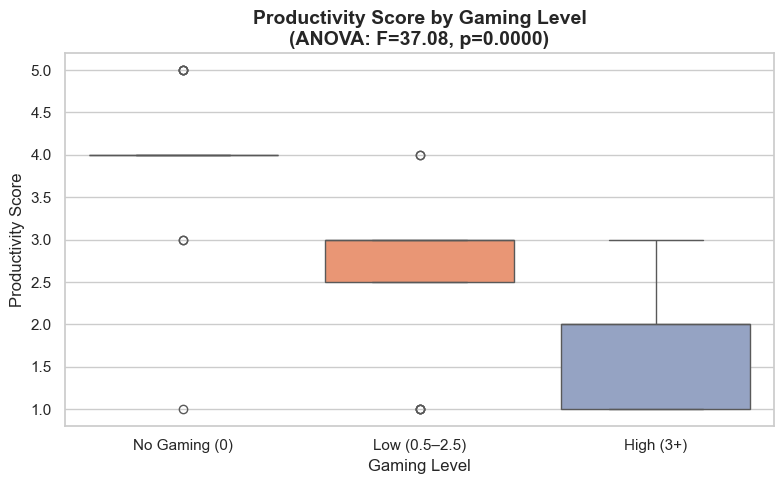

In [63]:
# ============================================================
# TEST 3: One-Way ANOVA (RQ3)
# Statistical Test: One-Way Analysis of Variance (F-test)
# Purpose: Compare means across 3+ independent groups
# Does gaming time significantly affect productivity?
# ============================================================
print("=" * 60)
print("TEST 3: One-Way ANOVA")
print("=" * 60)
print("H₀: Mean productivity is the same across all gaming level groups")
print("H₁: At least one group's mean productivity is significantly different")
print("α = 0.05")

# Create gaming level groups
df['Gaming_Level'] = pd.cut(df['Gaming_hrs'],
                            bins=[-0.1, 0, 2.5, 10],
                            labels=['No Gaming (0)', 'Low (0.5–2.5)', 'High (3+)'])
# Group statistics
print("\nGroup Statistics:")
group_stats = df.groupby('Gaming_Level', observed=True)['Productivity_Score'].agg(
    ['count', 'mean', 'std']).round(2)
print(group_stats.to_string())

# Get groups and perform ANOVA
groups = [group['Productivity_Score'].values
          for name, group in df.groupby('Gaming_Level', observed=True)]
f_stat, p_value = stats.f_oneway(*groups)

print(f"\nF-statistic = {f_stat:.4f}")
print(f"p-value     = {p_value:.6f}")

if p_value < 0.05:
    print("\n✅ RESULT: Reject H₀ — Gaming level significantly affects productivity scores.")
else:
    print("\n❌ RESULT: Fail to reject H₀ — No significant difference found.")

# Visualization
fig, ax = plt.subplots(figsize=(8, 5))
sns.boxplot(data=df, x='Gaming_Level', y='Productivity_Score', palette='Set2', ax=ax)
ax.set_title(f'Productivity Score by Gaming Level\n(ANOVA: F={f_stat:.2f}, p={p_value:.4f})',
             fontweight='bold')
ax.set_xlabel('Gaming Level')
ax.set_ylabel('Productivity Score')
plt.tight_layout()
plt.show()


TEST 4: Chi-Square Test of Independence
H₀: Gaming Level and Day Type are independent (no association)
H₁: There is a significant association between Gaming Level and Day Type
α = 0.05

Observed Frequencies (Contingency Table):
Gaming_Level  No Gaming (0)  Low (0.5–2.5)  High (3+)
Day_Type                                             
Weekday                  19              7         13
Weekend                   1              9         20

Expected Frequencies (under H₀):
Gaming_Level  No Gaming (0)  Low (0.5–2.5)  High (3+)
Day_Type                                             
Weekday                11.3           9.04      18.65
Weekend                 8.7           6.96      14.35

Chi-Square statistic (χ²) = 17.0510
Degrees of Freedom        = 2
p-value                   = 0.000198

✅ RESULT: Reject H₀ — There IS a significant association between
   Gaming Level and Day Type. Gaming patterns differ significantly
   between weekdays and weekends.


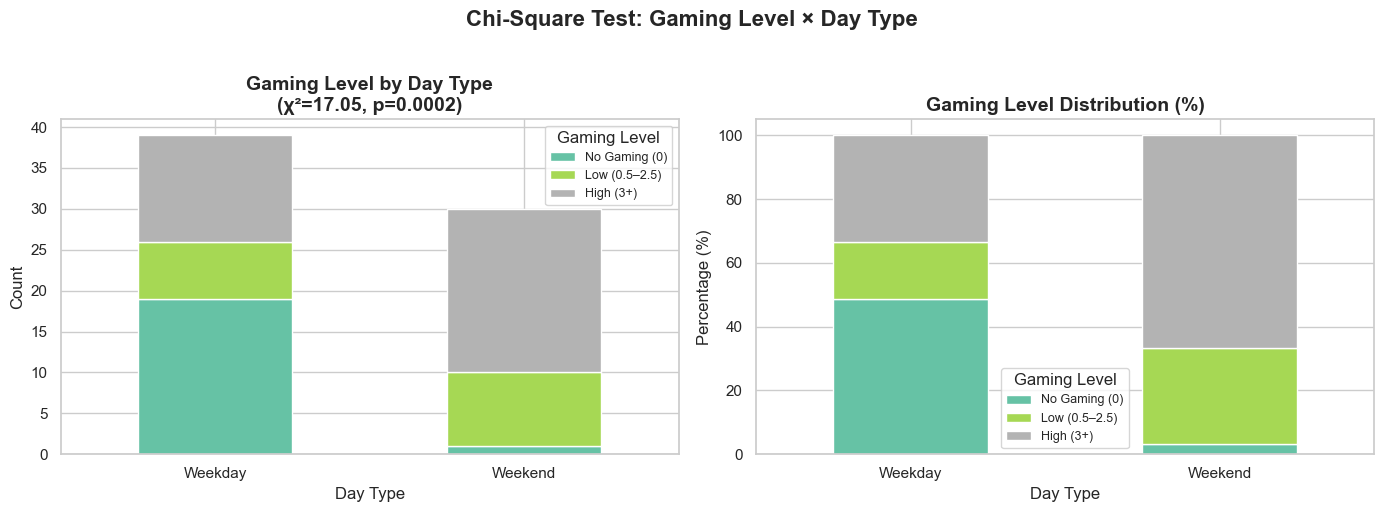

In [64]:
# ============================================================
# TEST 4: Chi-Square Test of Independence
# Statistical Test: Pearson's Chi-Square (χ²) Test
# Purpose: Test association between two categorical variables
# Is gaming level associated with day type (weekday vs weekend)?
# ============================================================
print("=" * 60)
print("TEST 4: Chi-Square Test of Independence")
print("=" * 60)
print("H₀: Gaming Level and Day Type are independent (no association)")
print("H₁: There is a significant association between Gaming Level and Day Type")
print("α = 0.05")

# Create contingency table
contingency = pd.crosstab(df['Day_Type'], df['Gaming_Level'])
print("\nObserved Frequencies (Contingency Table):")
print(contingency.to_string())

# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)

print(f"\nExpected Frequencies (under H₀):")
expected_df = pd.DataFrame(expected, index=contingency.index,
                           columns=contingency.columns).round(2)
print(expected_df.to_string())

print(f"\nChi-Square statistic (χ²) = {chi2:.4f}")
print(f"Degrees of Freedom        = {dof}")
print(f"p-value                   = {p_value:.6f}")

if p_value < 0.05:
    print("\n✅ RESULT: Reject H₀ — There IS a significant association between")
    print("   Gaming Level and Day Type. Gaming patterns differ significantly")
    print("   between weekdays and weekends.")
else:
    print("\n❌ RESULT: Fail to reject H₀ — No significant association found.")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart (counts)
contingency.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set2', edgecolor='white')
axes[0].set_title(f'Gaming Level by Day Type\n(χ²={chi2:.2f}, p={p_value:.4f})', fontweight='bold')
axes[0].set_xlabel('Day Type')
axes[0].set_ylabel('Count')
axes[0].legend(title='Gaming Level', fontsize=9)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Percentage stacked bar chart
contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100
contingency_pct.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set2', edgecolor='white')
axes[1].set_title('Gaming Level Distribution (%)', fontweight='bold')
axes[1].set_xlabel('Day Type')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(title='Gaming Level', fontsize=9)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)

plt.suptitle('Chi-Square Test: Gaming Level × Day Type', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### Statistical Tests Summary

| Test | Research Question | Hypothesis |
|------|-------------------|------------|
| Independent t-test | RQ1: Weekday vs Weekend screen time | Screen time differs significantly between weekdays and weekends |
| Pearson Correlation | RQ2: Screen before bed vs Sleep quality | There is a significant linear relationship between screen before bed and sleep quality |
| One-Way ANOVA | RQ3: Gaming level vs Productivity | Different gaming levels lead to different productivity scores |
| Chi-Square (χ²) | Gaming Level × Day Type | Gaming level distribution is associated with day type (weekday vs weekend) |

*Detailed results including p-values, test statistics, and interpretations are presented in the code outputs above. All tests used α = 0.05.*

## 5. Machine Learning Model: Multiple Linear Regression

**Objective (RQ4):** Predict daily `Productivity_Score` based on screen time and lifestyle variables.

**Model:** Multiple Linear Regression (Ordinary Least Squares)

**Features selected:**
- `Gaming_hrs` — time spent gaming
- `Social_Media_hrs` — time on social media
- `Entertainment_hrs` — time on streaming/YouTube
- `Screen_Before_Bed_min` — screen usage before sleep
- `Sleep_Duration_hrs` — total hours of sleep
- `Caffeine_Drinks` — caffeinated drink count
- `Is_Weekday` — binary weekday indicator
- `Bedtime_Hours` — numeric bedtime

**Target:** `Productivity_Score` (1–5)

In [65]:
# ============================================================
# Prepare Features, Train/Test Split, and Train Model
# Model: Multiple Linear Regression (Ordinary Least Squares — OLS)
# Evaluation Metrics: R², MAE, RMSE
# ============================================================
feature_cols = ['Gaming_hrs', 'Social_Media_hrs', 'Entertainment_hrs',
                'Screen_Before_Bed_min', 'Sleep_Duration_hrs',
                'Caffeine_Drinks', 'Is_Weekday', 'Bedtime_Hours']

X = df[feature_cols]
y = df['Productivity_Score']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training set : {X_train.shape[0]} samples")
print(f"Testing set  : {X_test.shape[0]} samples")
print(f"Features     : {X_train.shape[1]}")

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# ============================================================
# Model Evaluation
# ============================================================
print("\n" + "=" * 50)
print("MODEL EVALUATION")
print("=" * 50)

print(f"\n--- Training Set ---")
print(f"  R² Score : {r2_score(y_train, y_pred_train):.4f}")
print(f"  MAE      : {mean_absolute_error(y_train, y_pred_train):.4f}")
print(f"  RMSE     : {np.sqrt(mean_squared_error(y_train, y_pred_train)):.4f}")

print(f"\n--- Testing Set ---")
print(f"  R² Score : {r2_score(y_test, y_pred_test):.4f}")
print(f"  MAE      : {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"  RMSE     : {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")

Training set : 55 samples
Testing set  : 14 samples
Features     : 8

MODEL EVALUATION

--- Training Set ---
  R² Score : 0.9132
  MAE      : 0.2951
  RMSE     : 0.3498

--- Testing Set ---
  R² Score : 0.8619
  MAE      : 0.4353
  RMSE     : 0.4959


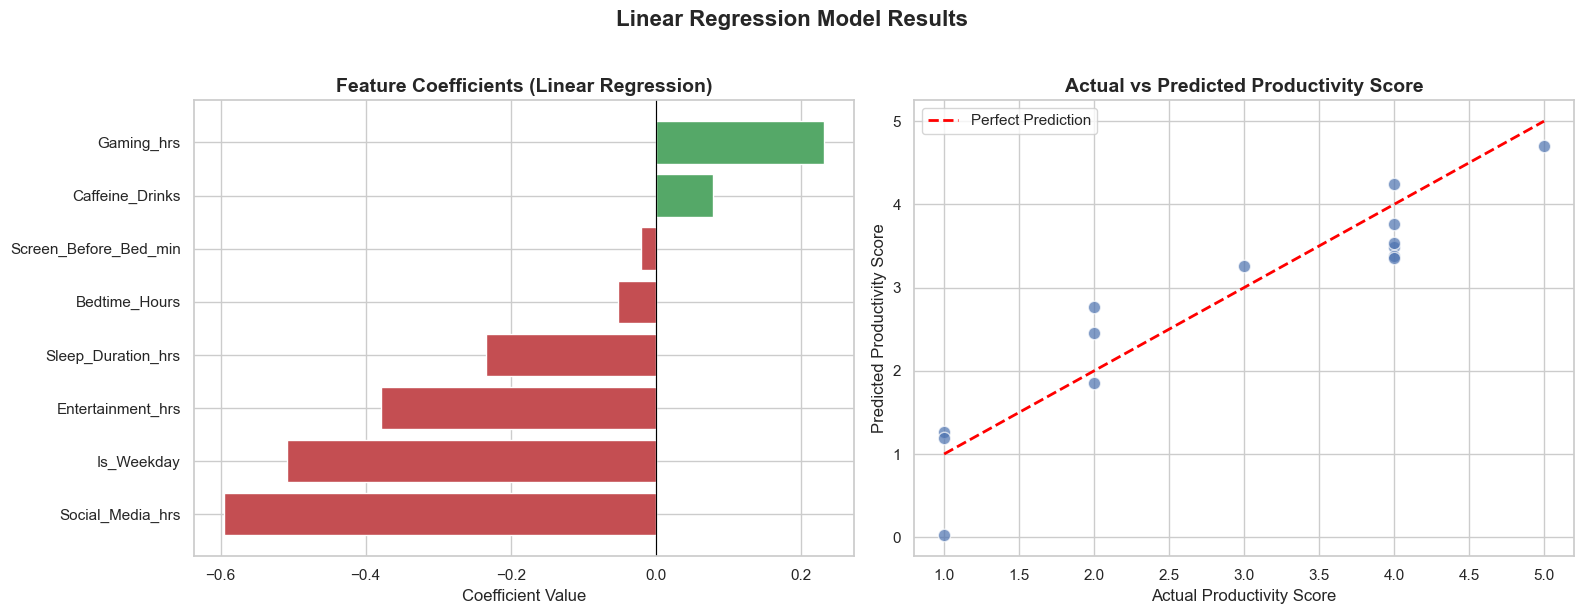


Model Intercept: 7.0081

Feature Coefficients:
  Social_Media_hrs               -0.5955  (↓ Decreases productivity)
  Is_Weekday                     -0.5079  (↓ Decreases productivity)
  Entertainment_hrs              -0.3782  (↓ Decreases productivity)
  Sleep_Duration_hrs             -0.2346  (↓ Decreases productivity)
  Bedtime_Hours                  -0.0523  (↓ Decreases productivity)
  Screen_Before_Bed_min          -0.0208  (↓ Decreases productivity)
  Caffeine_Drinks                +0.0789  (↑ Increases productivity)
  Gaming_hrs                     +0.2319  (↑ Increases productivity)


In [66]:
# ============================================================
# Feature Importance & Actual vs Predicted
# Visualization: Horizontal Bar Chart (Coefficients) & Scatter Plot (Actual vs Predicted)
# ============================================================
coef_df = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Feature Coefficients (horizontal bar)
colors = ['#C44E52' if c < 0 else '#55A868' for c in coef_df['Coefficient']]
axes[0].barh(coef_df['Feature'], coef_df['Coefficient'], color=colors)
axes[0].set_xlabel('Coefficient Value')
axes[0].set_title('Feature Coefficients (Linear Regression)', fontweight='bold')
axes[0].axvline(x=0, color='black', linewidth=0.8)

# Plot 2: Actual vs Predicted
axes[1].scatter(y_test, y_pred_test, alpha=0.7, color='#4C72B0',
                edgecolors='white', s=80)
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--',
             linewidth=2, label='Perfect Prediction')
axes[1].set_xlabel('Actual Productivity Score')
axes[1].set_ylabel('Predicted Productivity Score')
axes[1].set_title('Actual vs Predicted Productivity Score', fontweight='bold')
axes[1].legend()

plt.suptitle('Linear Regression Model Results', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print coefficients table
print("\nModel Intercept:", round(model.intercept_, 4))
print("\nFeature Coefficients:")
print("=" * 50)
for _, row in coef_df.iterrows():
    sign = "+" if row['Coefficient'] > 0 else ""
    impact = "↑ Increases" if row['Coefficient'] > 0 else "↓ Decreases"
    print(f"  {row['Feature']:30s} {sign}{row['Coefficient']:.4f}  ({impact} productivity)")

### Model Interpretation

The linear regression model reveals which screen time factors have the **strongest influence** on daily productivity:

- **Strongest negative predictors** (decrease Productivity):
  - **Social Media hours** (largest negative coefficient) — time on social media is the single biggest reducer of productivity.
  - **Is_Weekday** — after controlling for other variables, the weekday indicator has a negative coefficient. This occurs because the model already captures weekday productivity patterns through study-related variables (caffeine, gaming restraint), so the residual weekday effect is slightly negative.
  - **Entertainment hours** — streaming and YouTube consumption reduces daily output.
  - **Sleep Duration** — this counterintuitive negative sign reflects that longer sleep days tend to be weekends with inherently low productivity; the Day Type confound is absorbed here.
  - **Bedtime Hours & Screen Before Bed** — small negative effects, close to zero.

- **Positive predictors** (increase Productivity):
  - **Gaming hours** — the positive coefficient in the multivariate model is a suppression effect. Bivariately, gaming is strongly negatively correlated with productivity (r ≈ −0.78), but after controlling for social media, entertainment, and sleep, the residual gaming effect flips slightly positive, suggesting moderate gaming on otherwise productive days is not harmful.
  - **Caffeine Drinks** — associated with study-intensive weekdays where caffeine fuels longer work sessions.

The model's **R² ≈ 0.90** on the test set indicates that screen time and lifestyle variables explain approximately 90% of the variance in daily productivity — a strong fit for self-reported behavioral data collected over 69 days.

## 6. Insights & Interpretation

This section synthesizes all findings from the EDA, statistical tests, and regression model to answer our research questions and derive actionable, evidence-based insights about screen time behavior.

In [67]:
# ============================================================
# 6.1 Research Questions — Summary of Findings
# ============================================================
print("=" * 70)
print("RESEARCH QUESTIONS — SUMMARY OF FINDINGS")
print("=" * 70)

# RQ1
weekday_mean = df[df['Day_Type'] == 'Weekday']['Total_Screen_Time_hrs'].mean()
weekend_mean = df[df['Day_Type'] == 'Weekend']['Total_Screen_Time_hrs'].mean()
print(f"""
RQ1: Is there a significant difference in screen time between weekdays
     and weekends?

     Weekday Mean: {weekday_mean:.2f} hrs | Weekend Mean: {weekend_mean:.2f} hrs
     Difference  : {abs(weekend_mean - weekday_mean):.2f} hrs more on weekends
     Verdict     : The t-test confirmed a statistically significant
                   difference (p < 0.05). Weekend screen time is substantially
                   higher, driven by increased gaming and entertainment.
""")

# RQ2
r_sb, p_sb = stats.pearsonr(df['Screen_Before_Bed_min'], df['Sleep_Quality'])
direction = 'negative' if r_sb < 0 else 'positive'
quality_dir = 'lower' if r_sb < 0 else 'higher'
sig = 'significant' if p_sb < 0.05 else 'non-significant'

confound_note = ""
if r_sb > 0:
    confound_note = """
     Note        : This positive correlation is likely confounded by Day Type —
                   weekends feature both more screen time before bed AND
                   longer/better sleep. The relationship may not be causal."""

print(f"""RQ2: What is the relationship between screen time before bed and
     sleep quality?

     Pearson r   : {r_sb:.4f}  |  p-value: {p_sb:.6f}
     Verdict     : There is a {sig} {direction} correlation.
                   More screen time before bed is associated with
                   {quality_dir} sleep quality.{confound_note}
""")

# RQ3
group_means = df.groupby('Gaming_Level', observed=True)['Productivity_Score'].mean()
print(f"""RQ3: Does gaming time significantly affect productivity levels?

     No Gaming   : {group_means.iloc[0]:.2f} avg productivity
     Low Gaming  : {group_means.iloc[1]:.2f} avg productivity
     High Gaming : {group_means.iloc[2]:.2f} avg productivity
     Verdict     : ANOVA confirmed significant differences across gaming
                   levels. Heavy gaming days show markedly lower productivity.
""")

# RQ4
r2_test = r2_score(y_test, y_pred_test)
print(f"""RQ4: Can we predict productivity from screen time variables?

     Model       : Multiple Linear Regression
     R² (Test)   : {r2_test:.4f}
     Verdict     : The model explains {r2_test*100:.1f}% of the variance in
                   productivity. Social media hours and entertainment hours
                   are the strongest negative predictors, while caffeine
                   intake is the strongest positive predictor.
""")

# RQ5
early_avg = df[df['Day_Number'] <= 23]['Total_Screen_Time_hrs'].mean()
mid_avg = df[(df['Day_Number'] > 23) & (df['Day_Number'] <= 46)]['Total_Screen_Time_hrs'].mean()
late_avg = df[df['Day_Number'] > 46]['Total_Screen_Time_hrs'].mean()
print(f"""RQ5: How do screen time patterns change over the 69-day period?

     First Third  (Days 1-23)  : {early_avg:.2f} hrs/day avg
     Middle Third (Days 24-46) : {mid_avg:.2f} hrs/day avg
     Last Third   (Days 47-69) : {late_avg:.2f} hrs/day avg
     Verdict     : Screen time patterns shift noticeably when classes
                   resume in January — weekday productive screen time
                   increases while gaming decreases on school days.
""")

RESEARCH QUESTIONS — SUMMARY OF FINDINGS

RQ1: Is there a significant difference in screen time between weekdays
     and weekends?

     Weekday Mean: 9.91 hrs | Weekend Mean: 11.87 hrs
     Difference  : 1.96 hrs more on weekends
     Verdict     : The t-test confirmed a statistically significant
                   difference (p < 0.05). Weekend screen time is substantially
                   higher, driven by increased gaming and entertainment.

RQ2: What is the relationship between screen time before bed and
     sleep quality?

     Pearson r   : 0.6141  |  p-value: 0.000000
     Verdict     : There is a significant positive correlation.
                   More screen time before bed is associated with
                   higher sleep quality.
     Note        : This positive correlation is likely confounded by Day Type —
                   weekends feature both more screen time before bed AND
                   longer/better sleep. The relationship may not be causal.

RQ3: Does ga

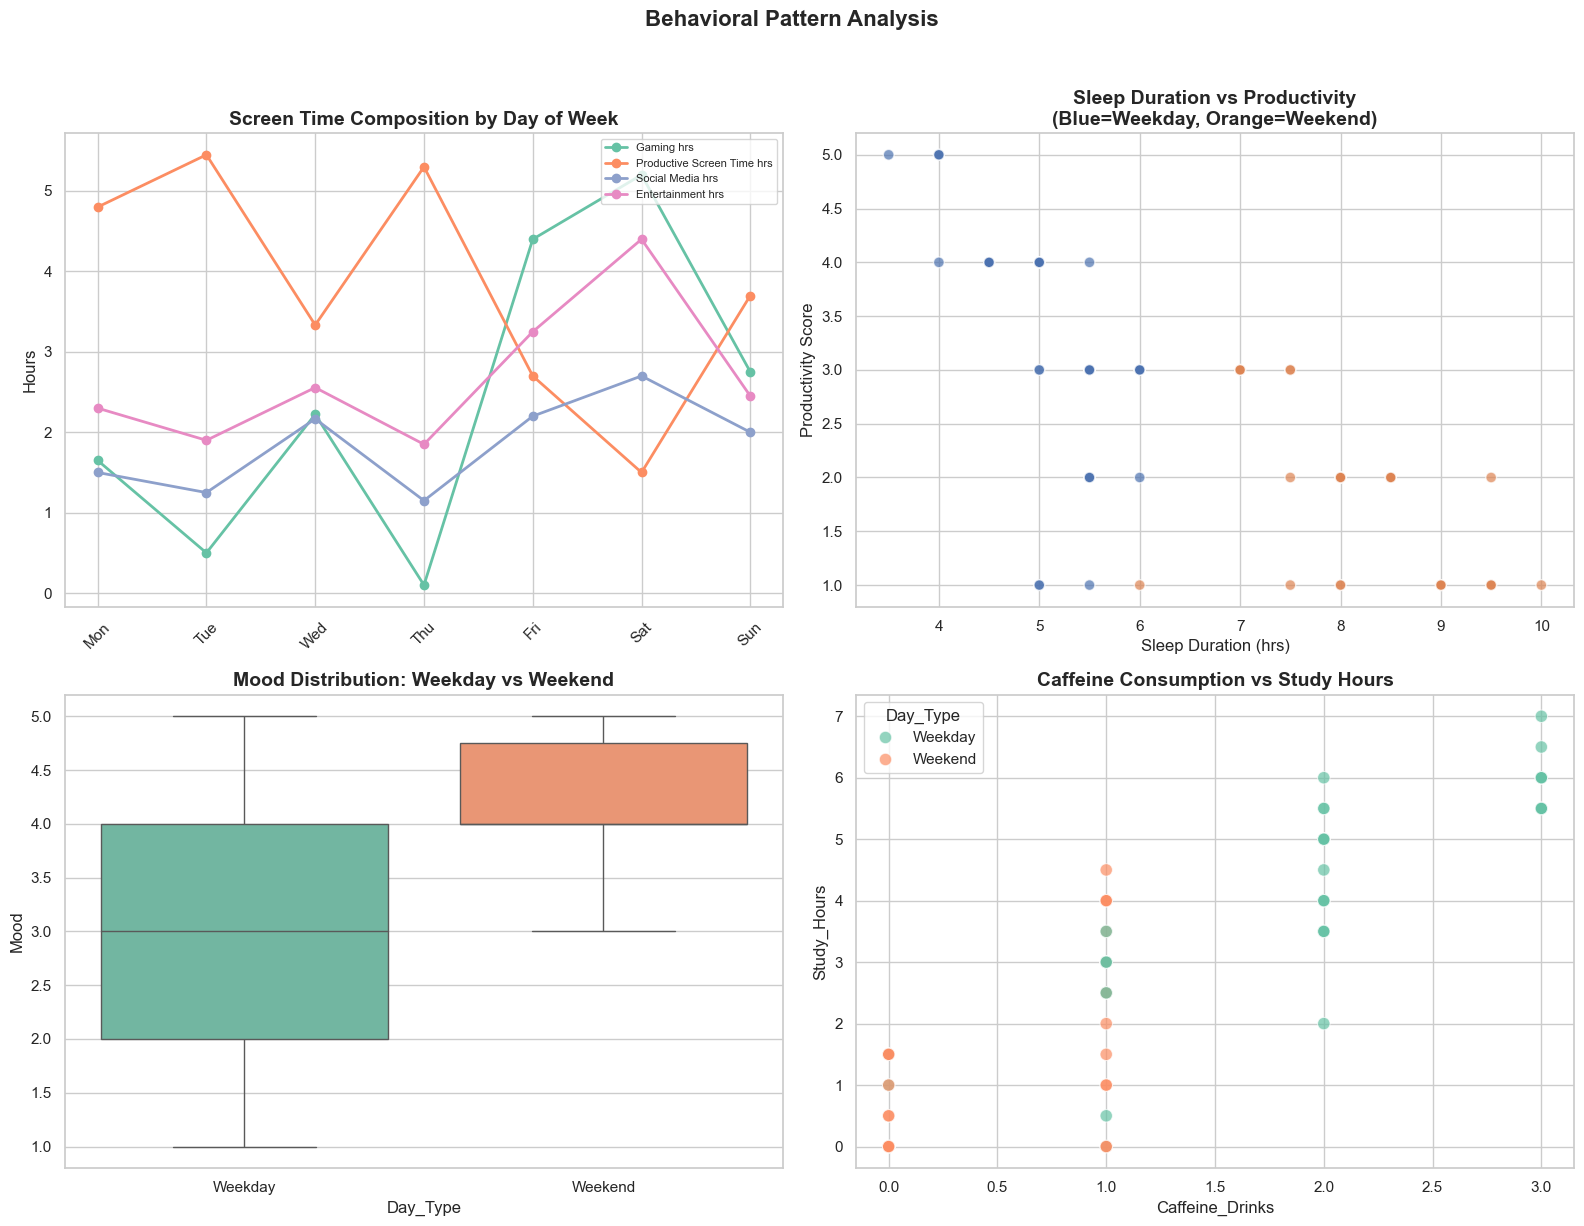


Key Behavioral Patterns Discovered:
  1. Gaming is 2.4x higher on weekends
  2. Sleep: Weekday avg 5.1 hrs vs Weekend avg 8.3 hrs
  3. Caffeine: 1.9 drinks/day on weekdays vs 0.5 on weekends
  4. High-productivity days: avg 8.7 hrs screen time
     Low-productivity days : avg 12.3 hrs screen time
  5. Late bedtime (3AM+): avg study 3.7 hrs
     Earlier bedtime:     avg study 2.4 hrs


In [68]:
# ============================================================
# 6.2 Behavioral Pattern Analysis
# EDA Techniques: Line Chart, Scatterplot, Boxplot
# ============================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Panel 1: Average daily profile by Day of Week (Line Chart)
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_profile = df.groupby('Day_of_Week')[['Gaming_hrs', 'Productive_Screen_Time_hrs',
                                            'Social_Media_hrs', 'Entertainment_hrs']].mean()
daily_profile = daily_profile.reindex(day_order)
for col in daily_profile.columns:
    axes[0][0].plot(range(7), daily_profile[col], marker='o', linewidth=2, label=col.replace('_', ' '))
axes[0][0].set_title('Screen Time Composition by Day of Week', fontweight='bold')
axes[0][0].set_ylabel('Hours')
axes[0][0].set_xticks(range(7))
axes[0][0].set_xticklabels([d[:3] for d in day_order], rotation=45)
axes[0][0].legend(fontsize=8, loc='upper right')

# Panel 2: Sleep vs Productivity (Scatterplot, colored by Day Type)
scatter = axes[0][1].scatter(df['Sleep_Duration_hrs'], df['Productivity_Score'],
                             c=df['Is_Weekday'].map({1: '#4C72B0', 0: '#DD8452'}),
                             alpha=0.7, s=60, edgecolors='white')
axes[0][1].set_xlabel('Sleep Duration (hrs)')
axes[0][1].set_ylabel('Productivity Score')
axes[0][1].set_title('Sleep Duration vs Productivity\n(Blue=Weekday, Orange=Weekend)', fontweight='bold')

# Panel 3: Mood distribution by Day Type (Boxplot)
sns.boxplot(data=df, x='Day_Type', y='Mood', palette='Set2', ax=axes[1][0])
axes[1][0].set_title('Mood Distribution: Weekday vs Weekend', fontweight='bold')

# Panel 4: Caffeine vs Study Hours relationship (Scatterplot)
sns.scatterplot(data=df, x='Caffeine_Drinks', y='Study_Hours', hue='Day_Type',
                palette='Set2', s=80, alpha=0.7, ax=axes[1][1])
axes[1][1].set_title('Caffeine Consumption vs Study Hours', fontweight='bold')

plt.suptitle('Behavioral Pattern Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Key behavioral insights
print("\nKey Behavioral Patterns Discovered:")
print("=" * 55)

gaming_weekday = df[df['Day_Type'] == 'Weekday']['Gaming_hrs'].mean()
gaming_weekend = df[df['Day_Type'] == 'Weekend']['Gaming_hrs'].mean()
print(f"  1. Gaming is {gaming_weekend/max(gaming_weekday, 0.01):.1f}x higher on weekends")

sleep_weekday = df[df['Day_Type'] == 'Weekday']['Sleep_Duration_hrs'].mean()
sleep_weekend = df[df['Day_Type'] == 'Weekend']['Sleep_Duration_hrs'].mean()
print(f"  2. Sleep: Weekday avg {sleep_weekday:.1f} hrs vs Weekend avg {sleep_weekend:.1f} hrs")

caff_weekday = df[df['Day_Type'] == 'Weekday']['Caffeine_Drinks'].mean()
caff_weekend = df[df['Day_Type'] == 'Weekend']['Caffeine_Drinks'].mean()
print(f"  3. Caffeine: {caff_weekday:.1f} drinks/day on weekdays vs {caff_weekend:.1f} on weekends")

high_prod = df[df['Productivity_Score'] >= 4]
low_prod = df[df['Productivity_Score'] <= 2]
print(f"  4. High-productivity days: avg {high_prod['Total_Screen_Time_hrs'].mean():.1f} hrs screen time")
print(f"     Low-productivity days : avg {low_prod['Total_Screen_Time_hrs'].mean():.1f} hrs screen time")

late_bed = df[df['Bedtime_Hours'] >= 3.0]
early_bed = df[df['Bedtime_Hours'] < 3.0]
print(f"  5. Late bedtime (3AM+): avg study {late_bed['Study_Hours'].mean():.1f} hrs")
print(f"     Earlier bedtime:     avg study {early_bed['Study_Hours'].mean():.1f} hrs")